# Homework 5: Web Scraping

## Larry Qu

<AxesSubplot:>

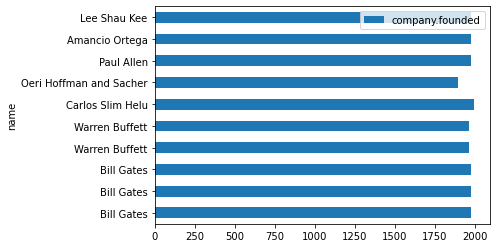

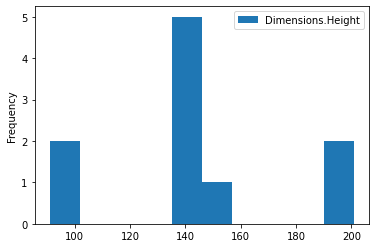

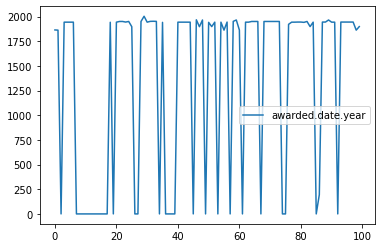

In [2]:
#Step 2: Use requests and BeautifulSoup to make a list of all the CORGIS datasets.

import requests
import pandas as pd
from bs4 import BeautifulSoup

response = requests.get("https://corgis-edu.github.io/corgis/csv/")
document = BeautifulSoup(response.text, "html.parser")
docNames = []
for doc in document.find_all('h3'):
    docNames.append(doc.text.strip())
        
    
#Step 3: Write a function that takes an element from the list of CORGIS datasets, 
#searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe.

def pdcorgis(csvName):
    link = "https://corgis-edu.github.io/corgis/csv/" + csvName.lower().replace(" ", "_") + "/"
    response = requests.get(link)
    document = BeautifulSoup(response.text, "html.parser")
    linkElements = document.find_all('a')
    #print(linkElements)
    rest = ""
    for i in linkElements:
        if i.has_attr('download'):
            rest = i['href']
            break
            
    downloadLink = link + rest
    return pd.read_csv(downloadLink)

#df = pdcorgis("Classics")
#print(df.head())
#print(docNames)


#Step 4: Using dataframes returned by your new function, make a line plot, a bar plot, and a histogram plot

#dataset1, bar plot
df1 = pdcorgis("Billionaires")
#print(df1.head())
a = df1[["company.founded", "name"]].iloc[:10]
a.plot(kind="barh", x="name", y="company.founded")

#dataset2, histogram
df2 = pdcorgis("Cars")
#print(df2.head())
b = df2[["Dimensions.Height"]].iloc[:10]
b.plot(kind="hist", y="Dimensions.Height")

#dataset3, line plot
df3 = pdcorgis("Medal Of Honor")
#print(df3.head())
df3[["awarded.date.year"]].iloc[:100].plot()

